<a href="https://colab.research.google.com/github/zhong338/MFM-FM5222/blob/main/Week4_LectureSlide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FM5222
# Week 4




## Topics

1. Bootstraping, MSE, Bias, and Variance
2. Confidence Intervals: Basic Bootstrap CI
3. Examples


## Bootsrapping, MSE, Bias, and Variance


Suppose we draw $N$ IID samples points from some underlying distribution.  Call this sample $\mathbf{X} \in \mathbb{R}^N$.

The underlying distribution may have certain properties that we wish to infer from the data   
Let's call this item of interest $\theta$.  It could be a parameter of distribution, but perhaps it's just something descriptive like median, IQR, or the second moment.   Typical items of interest are 

* Mean  (location)
* Standard Deviation (scale)
* Skew
* Kurtosis
* IQR
* Shape Parameters



An estimator is some function $t: \mathbb{R}^N \to \mathbb{R}$ that hopefully givess an approximate value of our item of interest $\theta$. 

We have already discussed several of these:

* The sample average to estimate $\mu_X$
* The sample variance to estimate $\sigma_X^2$
* MLE's 

But a question we are now asking is, how reliable is the estimator?   We know that $t(\mathbf{X})$ is itself a random variable, and we previously discussed the properties such as

* Unbiased
* Asymptotically unbiased
* Consistency
* Variance


Let's focus on three measures of "quality" that can be used to assess an estimator and to better understand what it is telling us.

### Mean Squared Error (MSE)

MSE measures the expected squared error of the estimator relative to the "true" value of the parameter. That is,

$$\mathrm{MSE}(t) = \mathrm{E}\left[(t(\mathbf{X}) - \theta)^2   \right]$$

Clearly, smaller is better.


### Bias

Bias tells whether, in expectation,  our estimator is centered on the target. 

$$\mathrm{Bias}(t) = \mathrm{E}\left[t(\mathbf{X}) - \theta   \right]$$

Positive bias means the estimator tends to over estimate while negative bias the opposite.


### Variance

The Variance is exactly what it sounds like:

$$\mathrm{Var}(t) = \mathrm{Var}\left(t(\mathbf{X})\right)$$

We can think of the MSE as a measure of over-all accuracy, bias as a measure of directional error, and variance as a measure of the precision of the estimate.

A common analogy is that of a target shooter.  If the shots are tightly located 2 units to the left of the bullseye, then the shooter's targeting is biased while simultaneously having high precision. On the other hand, if the shots are centered around the bullseye, but widely dispersed, we say the shooter in unbiased, but imprecise.

A shooter who hopes to win will need to have low bias and high precision.


It is not hard to show that these three measures have a simple relationship.

$$\mathrm{MSE}(t) = \mathrm{Bias}(t)^2 + \mathrm{Var}(t)$$


In the video, we showed how bootstrapping can give us estimates of the Bias and Variance (or equivalently, standard deviation) of an estimator.  We can see therefore that it can also give us an estimate of the MSE.

#### Example

We will generate a sample of $150$ draws from the lognormal distribution with $\sigma = 5$. From that, we will estimate the IQR simply by computing the IQR of the sample.

We will then generate estimates for the MSE, Bias, and Variance by bootstrapping.

Finally, we will compare these estimate with more "true" values that will generate by sampling from the actual distribution repeatedly (not limiting ourselves to our small sample.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

In [ ]:
N = 150
dataset = ss.lognorm.rvs(size = N,s = 5, random_state = 1978)

IQR_est = np.quantile(dataset, .75) - np.quantile(dataset, .25)

print("The initial IRQ estimate is ", IQR_est)


The initial IRQ estimate is  34.569485272491185


Now we create the bootstrap routine.

In [ ]:
B = 1000

IQRs = np.zeros(B)

for s in range(B):
    sample = np.random.choice(dataset, size= N)  # note that replace =True is default
    IQRs[s] =  np.quantile(sample, .75) - np.quantile(sample, .25)
    
    
bias_est = IQRs.mean() - IQR_est

Var_est = IQRs.var()

MSE_est = np.mean((IQRs - IQR_est)**2)

print("The bias estimate from bootstrap is ", bias_est)

print("The standard deviation estimate from bootstrap is ", np.sqrt(Var_est))

print("The MSE estimate from boootstrap is ", MSE_est)

print("And just checking the formula for MSE ", bias_est**2 + Var_est)

The bias estimate from bootstrap is  1.3979302225065524
The standard deviation estimate from bootstrap is  17.78149566451862
The MSE estimate from boootstrap is  318.1357969742917
And just checking the formula for MSE  318.1357969742917


Like in the video, we will now getter better estimates for these by repeatedly drawing $150$ from the lognormal( not limiting to our sample dateset).  In real life, we don't get to do this.

We also calcuate the "true" IQR using scipy.

In [ ]:
M = 1000 

Iqr = np.zeros(M)

for s in range(M):
    
    sample = ss.lognorm.rvs(size = N,s = 5)
    Iqr[s] =  np.quantile(sample, .75) - np.quantile(sample, .25)
    
IQR = ss.lognorm.ppf(.75, s =5) -   ss.lognorm.ppf(.25, s =5)

print("The actual IQR is ", IQR)

Bias = Iqr.mean() - IQR

print("The actual bias is about ", Bias)

Variance = Iqr.var()

print("The actual standard deviation is about ", np.sqrt(Variance))

print("The MSE is about ", Bias**2 + Variance)
    

The actual IQR is  29.11551485490638
The actual bias is about  4.20826095548734
The actual standard deviation is about  20.3699077004525
The MSE is about  432.64259999443334


If you think about it, our bootstrap did really well.  We only had 150 data points to work with!


Just for fun, let's compare the KDE's of the bootstrapped estimated IQRs with the KDE of the actual estimator distribution.

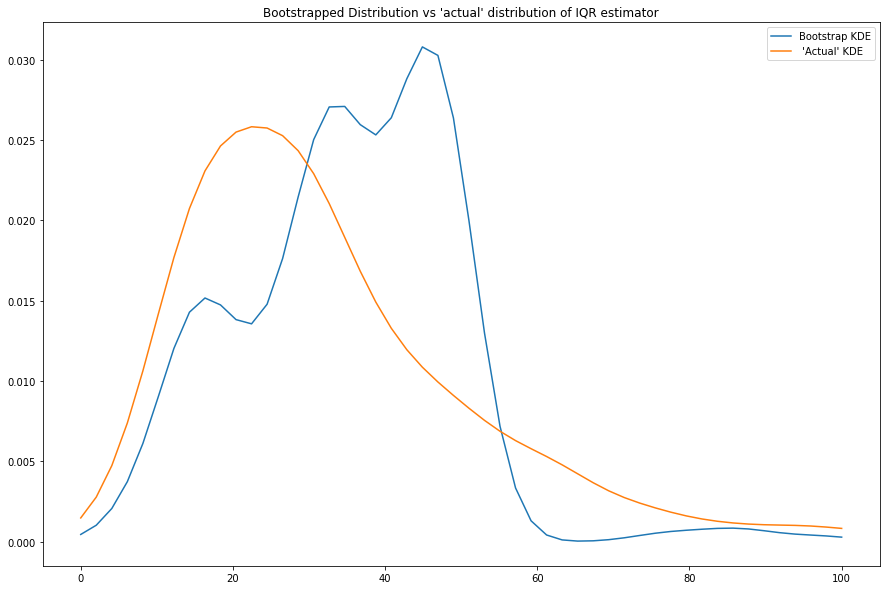

In [ ]:
x = np.linspace(0,100)
plt.figure(figsize = (15,10))

plt.plot(x, ss.gaussian_kde(IQRs)(x), label ="Bootstrap KDE")

plt.plot(x, ss.gaussian_kde(Iqr)(x), label =" 'Actual' KDE")

plt.legend()

plt.title("Bootstrapped Distribution vs 'actual' distribution of IQR estimator")

plt.show()


## Confidence Intervals

Suppose we have gone ahead and estimated our item of interest. Let's call it $\theta$ and our estimate $\hat{\theta}$  

We seek now a confidence interval for where we think the "true" value might lie.

One idea that may immediately come to mind would be to estimate the standard deviation of the estimator via bootstrap, call this $\sigma_{\hat{\theta}}$.  Then we construct the CI in a rather standard way:

$$CI = \left(\hat{\theta} - z_{\alpha/2}\sigma_{\hat{\theta}}, \hat{\theta} + z_{\alpha/2}\sigma_{\hat{\theta}}\right)$$

where $z_{\alpha/2} = \Phi^{-1}(1-\alpha/2)$

Or, perhaps if the sample size is not large, replace $z_{\alpha/2}$ with $t_{\alpha/2;\nu}$ using the appropriate $T$ distribution instead of the normal.  

However, as we have seen, this can be problematic as often, the estimators don't really follow the normal or the student T distribution.  Consider the example we just did!

### Basic Bootstrap Confidence Interval

What we are interested in is understaning how the estimator can vary both above and below the "true mean".  What we can infer from the bootstrap is how the estimator will very above or below the estimate from the sample population.  Let's say for example we are interested in a $90\%$ CI.  We could observe $.05$ quantile of our bootstrapped estimates, call with $q_L$. Similarly, we observe the $.95$ quantile of our bootstrapped estimates.  Call this $q_U$.

Our bootstrap is saying what the estimators will vary around the actual value in manner similar to how the bootstrapped estimator vary around $\hat{\theta}$.

Now, if things are symmetric, the $q_U - \hat{\theta} \approx \hat{\theta} - q_L$ and we might be tempted just to set the interval as $$\hat{\theta} \pm \frac{q_U -q_L}{2} $$

But what if things are not symmetric?  That is, suppose that things are skewed to the right.  Then

$$q_U - \hat{\theta} > \hat{\theta} - q_L$$

First, this means that the estimator is more likely to aim high than to aim low. So if we wish to understand how $\hat{\theta}$ relates to $\theta$, we would expect that it is more likely that $\hat{\theta}$ is too high than too low.  So our confidence interval will reverse the distances in question.  That is, the CI will be:

$$\left(\hat{\theta} - (q_U -  \hat{\theta}) ,\hat{\theta} + (\hat{\theta} - q_L)       \right)$$

As noted in the text, this is the same as

$$\left(2\hat{\theta} - q_U  ,2\hat{\theta}  - q_L)       \right)$$

This is the Basic Bootstrap Confidence Interval





#### Example continued

Using the bootstrap previously done, calculate the Basic Confidence Interval (at the $\alpha = .1$ level) for the IQR.



In [ ]:

qL = np.quantile(IQRs,.05 )
qU = np.quantile(IQRs,.95 )

print("The basic bootrap confidence interval (90%) is (",2*IQR_est - qU,", ",2*IQR_est - qL,")")

The basic bootrap confidence interval (90%) is ( 19.21671504185735 ,  55.520708878684005 )


## Examples

### General Motors (GM)

We will take 10 years of GM stock price log-returns and fit them to a student T distribution.  This will have three parameters, location, scale, and $\nu$.    Fit using the fit method (which by default uses MLE) and use bootstrap to get estimates of (for each parameter):

1. Bias
2. Standard Deviation
3. $90\%$ confidence interval.

In [ ]:
!pip install yfinance

     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 6.4 MB 38.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import yfinance as yf


In [ ]:
GM = yf.Ticker("GM").history(start = "2012-01-01", end="2022-01-01")

GM['Lret'] = np.log(GM.Close).diff()   # I should probably work dividends in here.  But that won't matter much 
GM = GM.dropna()

Getting our initial MLE estimates:

In [ ]:
params_ests = ss.t.fit(GM.Lret)
params_ests

(3.1833301619763485, 0.00032220737851245844, 0.013195932617252167)

In [ ]:
np.array(params_ests)

array([3.18333016e+00, 3.22207379e-04, 1.31959326e-02])

Next, we set up our bootstrapping loops and MLE fit each time.

In [ ]:
B = 1000

params_bs = np.zeros([B,3])

for s in range(B):
    sample = np.random.choice(GM.Lret, size = len(GM))
    params_bs[s,:] = np.array(ss.t.fit(sample))
    


The biases

In [ ]:
bias = params_bs.mean(axis=0) - params_ests
bias

array([ 2.05264526e-02, -8.24400268e-07, -4.26797509e-06])

In [ ]:
 bias/params_ests

array([ 0.00644811, -0.0025586 , -0.00032343])

We can see that they are all relatively small (remember, MLEs are asymptotically unbiased, so this is unsurpring).

Standard Deviations

In [ ]:
sds =  params_bs.std(axis=0)
sds

array([0.23001755, 0.00033374, 0.00035619])

In [ ]:
 sds/params_ests

array([0.07225689, 1.0357848 , 0.02699206])

We see that these are more significant.  The large relative location error is probably not *that* big of deal given that it is very small. But we will come back to that.


Basic Bootstrap Confidence Interval


In [ ]:
qu = np.quantile(params_bs,.95, axis = 0 )
ql = np.quantile(params_bs,.05, axis = 0 )

print("The lower end point for nu is ", 2*params_ests[0] - qu[0])
print("The upper end point for nu is ", 2*params_ests[0] - ql[0])

print("The lower end point for location is ", 2*params_ests[1] - qu[1])
print("The upper end point for location is ", 2*params_ests[1] - ql[1])

print("The lower end point for scale is ", 2*params_ests[2] - qu[2])
print("The upper end point for scale is ", 2*params_ests[2] - ql[2])


The lower end point for nu is  2.7954142442232297
The upper end point for nu is  3.50421642066819
The lower end point for location is  -0.00020920315877522272
The upper end point for location is  0.000841634998664804
The lower end point for scale is  0.012618909254477367
The upper end point for scale is  0.013770789596343203


As always, graphs can be helpful.

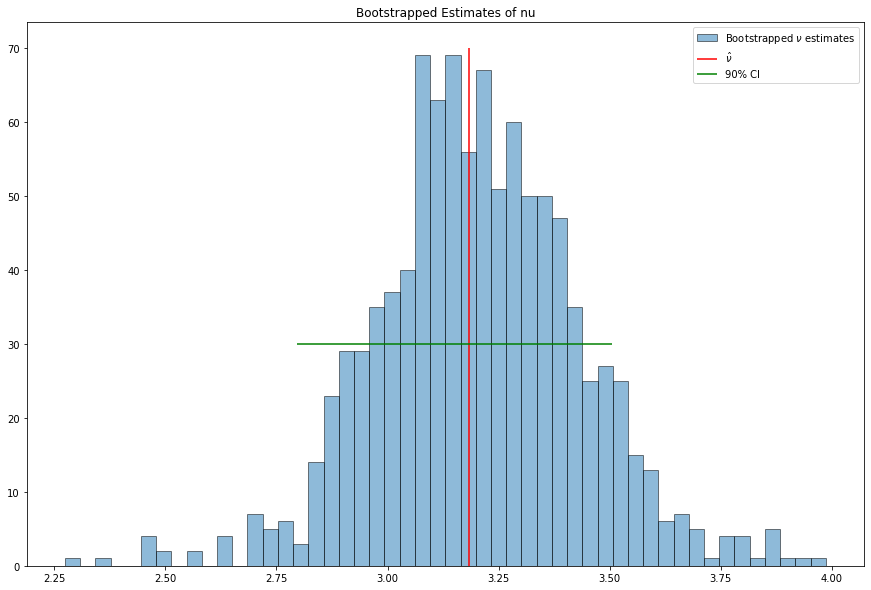

In [ ]:
plt.figure(figsize = (15,10))

plt.hist(params_bs[:,0], bins = 50, alpha = .5, edgecolor = "black", label = "Bootstrapped $\\nu$ estimates")

plt.vlines(params_ests[0], 0, 70, color ='r', label="$\\hat{\\nu}$")

plt.hlines(30,2*params_ests[0] - qu[0], 2*params_ests[0] - ql[0], color = 'g', label = "90% CI" )

plt.legend()

plt.title("Bootstrapped Estimates of nu")
plt.show()

For the location, I am going to rescale everything by 252, so that we can see what the uncertianty means on an annualized basis.

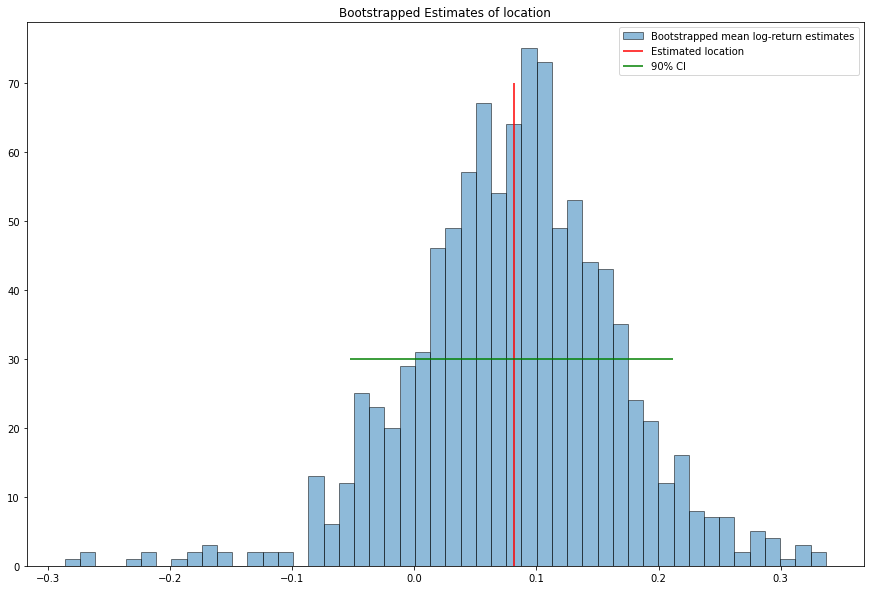

In [ ]:
plt.figure(figsize = (15,10))

plt.hist(252*params_bs[:,1], bins = 50, alpha = .5, edgecolor = "black", label = "Bootstrapped mean log-return estimates")

plt.vlines(252*params_ests[1], 0, 70, color ='r', label="Estimated location")

plt.hlines(30,252*(2*params_ests[1] - qu[1]), 252*(2*params_ests[1] - ql[1]), color = 'g', label = "90% CI" )

plt.legend()

plt.title("Bootstrapped Estimates of location")
plt.show()

This suggests that we really cannot infer very easily from the data what the mean log-return of GM is (under this model).  Maybe is greater that $20\%$ (annualized), maybe it's negative!

This can have big implications is asset allocation models where, say, the expected return on this asset were an input into an optimization.

The scale parameter is maybe the most stable.



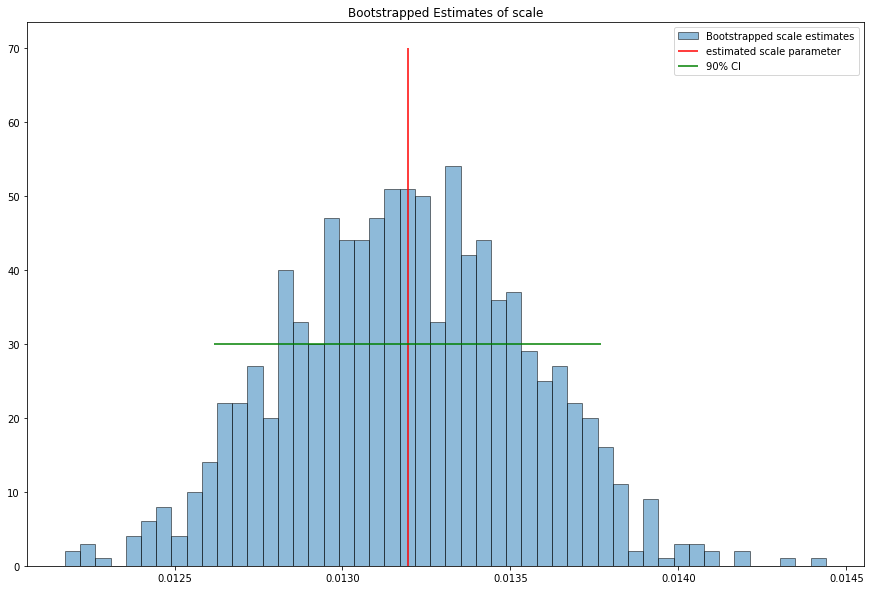

In [ ]:
plt.figure(figsize = (15,10))

plt.hist(params_bs[:,2], bins = 50, alpha = .5, edgecolor = "black", label = "Bootstrapped scale estimates")

plt.vlines(params_ests[2], 0, 70, color ='r', label="estimated scale parameter")

plt.hlines(30,2*params_ests[2] - qu[2], 2*params_ests[2] - ql[2], color = 'g', label = "90% CI" )

plt.legend()

plt.title("Bootstrapped Estimates of scale")
plt.show()

There is of course some joint varation in these estimates.  We won't explore that here.  But, I will mention that if you really want to understand the joint distribution of the parameters given the data, we will want to use Bayesian methods and MCMC. 

###  VIX

Let's take a look at the VIX over the last 10 years and see what we can infer.

In [ ]:
VIX = yf.Ticker("^VIX").history(start = "2012-01-01", end="2022-01-01")

VIX.head

<bound method NDFrame.head of                  Open       High        Low  ...  Volume  Dividends  Stock Splits
Date                                         ...                                 
2012-01-03  22.950001  23.100000  22.540001  ...       0          0             0
2012-01-04  23.440001  23.730000  22.219999  ...       0          0             0
2012-01-05  22.750000  23.090000  21.340000  ...       0          0             0
2012-01-06  21.240000  21.719999  20.580000  ...       0          0             0
2012-01-09  21.670000  21.780001  21.000000  ...       0          0             0
...               ...        ...        ...  ...     ...        ...           ...
2021-12-27  19.370001  19.410000  17.549999  ...       0          0             0
2021-12-28  17.780001  18.469999  17.510000  ...       0          0             0
2021-12-29  17.629999  18.000000  16.709999  ...       0          0             0
2021-12-30  17.299999  17.790001  16.620001  ...       0          0 

Let's first look at the close series to see if changes are stationary or trending.

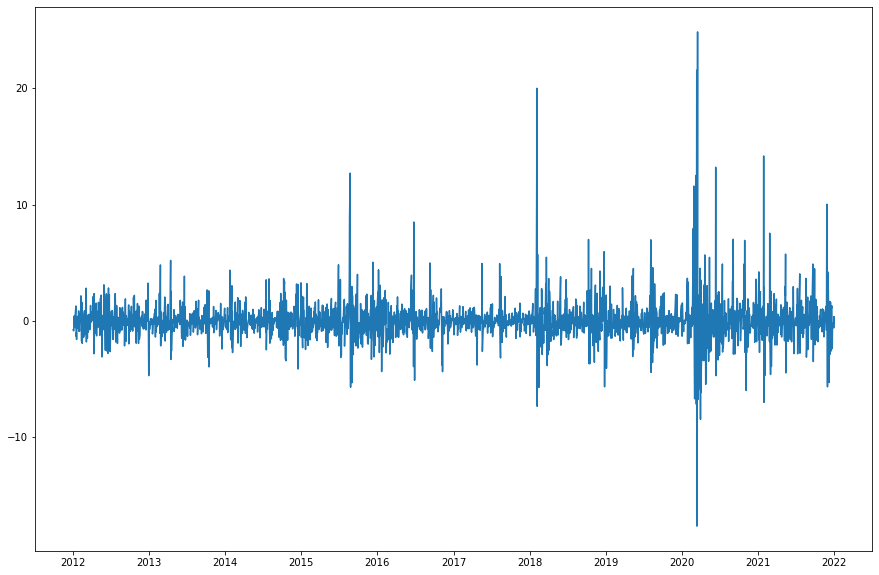

In [ ]:
plt.figure(figsize = (15,10))
plt.plot(VIX.Close.diff())

plt.show()

Fair enough. We will a column for the changes on work with it.

In [ ]:
VIX["Change"] = VIX.Close.diff()

VIX = VIX.dropna()

Let make a quick histogram (before we do anything else).

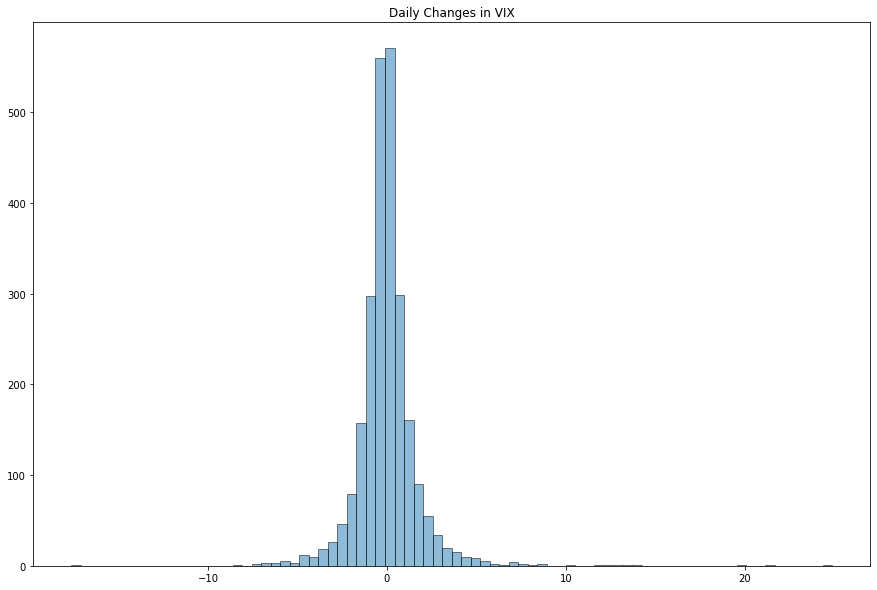

In [ ]:
plt.figure(figsize = (15,10))
plt.hist(VIX.Change, bins = 80, alpha = .5, edgecolor = "black")

plt.title("Daily Changes in VIX")

plt.show()

There definitely appears to be some signifigant right skew.  Let's measure the skew two ways:

1. By calculating the sample skew
2. By calculating a quantile based skew measure.

We will then use bootrapping to assess these two measures.

### Sample Skew



In [ ]:
skew_est = ss.skew(VIX.Change)

skew_est

2.7252956631816576

Setting up the bootstrap. We will estimate for this measure

1. Bias
2. Standard Deviation
3. A $90\%$ confidence interval.

In [ ]:
B = 1000

skews = np.zeros(B)

for s in range(B):
    sample = np.random.choice(VIX.Change, size = len(VIX.Close))
    skews[s] = ss.skew(sample)
    
    
bias1 = skews.mean() - skew_est

print("The estimated bias of sample skew is ", bias1)

std1 = skews.std()

print("The estimated standard devation aka standard error of the sample skew is ",std1 )

qu1 = np.quantile(skews, .95)
ql1 = np.quantile(skews,.05)

print("The basic bootstrap 90% CI for skew of the VIX is (",2*skew_est - qu1,",",2*skew_est - ql1, ")" )



The estimated bias of sample skew is  -0.14969820826864355
The estimated standard devation aka standard error of the sample skew is  1.0116496199543503
The basic bootstrap 90% CI for skew of the VIX is ( 1.2739210625072612 , 4.641088955845897 )


Let's plot.

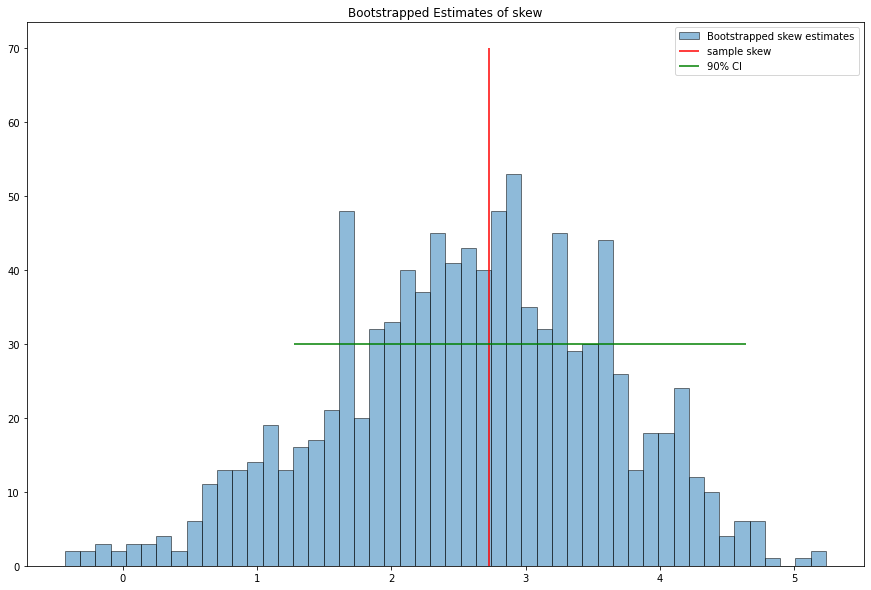

In [ ]:
plt.figure(figsize = (15,10))

plt.hist(skews, bins = 50, alpha = .5, edgecolor = "black", label = "Bootstrapped skew estimates")

plt.vlines(skew_est, 0, 70, color ='r', label="sample skew")

plt.hlines(30,2*skew_est - qu1, 2*skew_est - ql1, color = 'g', label = "90% CI" )

plt.legend()

plt.title("Bootstrapped Estimates of skew")
plt.show()

### Quantile Based Skew

We will instead use a skew measure that (perhaps) is more robust.   We will define 
$$\mathrm{qSkew}(x) =  \frac{(q(x,.99) - q(x,.5))- (q(x,.5) - q(x,.01))}{q(x,.75) - q(x,.25)}\\
= \frac{q(x,.99) - 2 q(x,.5))+ q(x,.01)}{q(x,.75) - q(x,.25)}$$

This compares the distance from the the median to the 99th percentile  versus the distance from 1st percentile to the median. The denominator normalizes to the IQR.

We go through all the same steps once we define our function.

In [ ]:
qSkew = lambda x: (np.quantile(x,.99) - 2*np.quantile(x,.5) + np.quantile(x,.01))/\
(np.quantile(x,.75) - 2*np.quantile(x,.25))

In [ ]:
qSkew_est = qSkew(VIX.Change)
qSkew_est

0.4594867254105215

In [ ]:
B = 1000

qskews = np.zeros(B)

for s in range(B):
    sample = np.random.choice(VIX.Change, size = len(VIX.Close))
    qskews[s] = qSkew(sample)
    
    
bias2 = qskews.mean() - qSkew_est

print("The estimated bias of quantile skew is ", bias2)

std2 = qskews.std()

print("The estimated standard devation aka standard error of the quantile skew is ",std2 )

qu2 = np.quantile(qskews, .95)
ql2 = np.quantile(qskews,.05)

print("The basic bootstrap 90% CI for quantile skew of the VIX is (",2*qSkew_est - qu2,",",2*qSkew_est - ql2, ")" )

The estimated bias of quantile skew is  0.047080795147833254
The estimated standard devation aka standard error of the quantile skew is  0.3049830586196925
The basic bootstrap 90% CI for quantile skew of the VIX is ( -0.1943523760173793 , 0.8000078749166156 )


Plotting

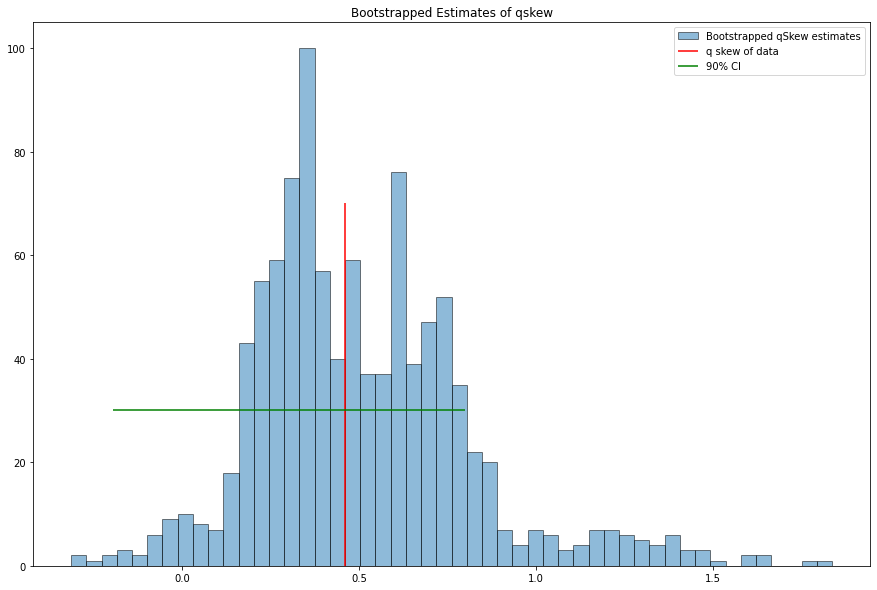

In [ ]:
plt.figure(figsize = (15,10))

plt.hist(qskews, bins = 50, alpha = .5, edgecolor = "black", label = "Bootstrapped qSkew estimates")

plt.vlines(qSkew_est, 0, 70, color ='r', label="q skew of data")

plt.hlines(30,2*qSkew_est - qu2, 2*qSkew_est - ql2, color = 'g', label = "90% CI" )

plt.legend()

plt.title("Bootstrapped Estimates of qskew")
plt.show()